In [ ]:
import os

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_path = "/content/gdrive/MyDrive/dermamnist.npz"
data = np.load(data_path)
X_train = data['train_images']
y_train = data['train_labels']
X_val = data['val_images']
y_val = data['val_labels']
X_test = data['test_images']
y_test = data['test_labels']

In [ ]:
data = np.load(data_path)

In [ ]:
X_train = data['train_images']
y_train = data['train_labels']
X_val = data['val_images']
y_val = data['val_labels']
X_test = data['test_images']
y_test = data['test_labels']

In [ ]:
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

x_train shape: (7007, 28, 28, 3) y_train shape: (7007, 1)


In [ ]:
#Data Pre-processing

#Data Normalization
x_train = X_train.astype('float32') / 255
x_val = X_val.astype('float32') / 255
x_test = X_test.astype('float32') / 255

# Reshape the images
import tensorflow as tf
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 3)
x_valid = x_val.reshape(x_val.shape[0], w, h, 3)
x_test = x_test.reshape(x_test.shape[0], w, h, 3)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 7)
y_valid = tf.keras.utils.to_categorical(y_val, 7)
y_test = tf.keras.utils.to_categorical(y_test, 7)

In [ ]:
x_train.shape

(7007, 28, 28, 3)

In [ ]:
import tensorflow as tf
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 3)
x_valid = x_val.reshape(x_val.shape[0], w, h, 3)
x_test = x_test.reshape(x_test.shape[0], w, h, 3)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 7)
y_valid = tf.keras.utils.to_categorical(y_val, 7)
y_test = tf.keras.utils.to_categorical(y_test, 7)

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (7007, 28, 28, 3) y_train shape: (7007, 7)
7007 train set
1003 validation set
2005 test set


In [ ]:
# CNN Model 1

In [ ]:
model1 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,3))) 
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(7, activation='softmax'))


In [ ]:
model1.summary()
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
checkpointer = ModelCheckpoint(filepath='basemodel.weights.best.hdf5', verbose = 1, save_best_only=True)
history1 = model1.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
110/110 [==============================] - ETA: 0s - loss: 1.0646 - accuracy: 0.6652
Epoch 1: val_loss improved from inf to 1.17148, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 13s 109ms/step - loss: 1.0646 - accuracy: 0.6652 - val_loss: 1.1715 - val_accuracy: 0.6361
Epoch 2/10
110/110 [==============================] - ETA: 0s - loss: 0.9594 - accuracy: 0.6693
Epoch 2: val_loss improved from 1.17148 to 0.95404, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 12s 109ms/step - loss: 0.9594 - accuracy: 0.6693 - val_loss: 0.9540 - val_accuracy: 0.6750
Epoch 3/10
110/110 [==============================] - ETA: 0s - loss: 0.9168 - accuracy: 0.6769
Epoch 3: val_loss improved from 0.95404 to 0.94248, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 16s 144ms/step - loss: 0.9168 - accuracy: 0.6769 - val_loss: 0.9425 - val_accuracy: 0.6750
Epoch 4/10
110/110 [======

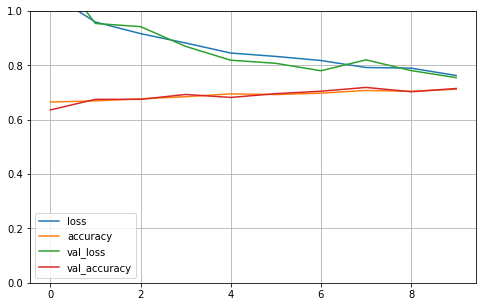

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
prediction = model1.predict(x_test)

In [ ]:
pred_1 = np.zeros_like(prediction)
pred_1[np.arange(len(prediction)), prediction.argmax(1)] = 1

In [ ]:
p1 = [np.argmax(p, axis=None, out=None) for p in pred_1]

In [ ]:
yt = []
for y in y_test_og:
  yt.append(y[0])


[5, 3, 4, 0, 5, 5, 5, 4, 5, 2, 1, 5, 4, 5, 5, 4, 4, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 4, 5, 2, 2, 2, 5, 2, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 2, 5, 5, 5, 5, 0, 5, 5, 5, 4, 5, 4, 5, 5, 5, 1, 3, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 1, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 3, 5, 5, 1, 5, 5, 5, 2, 5, 4, 5, 5, 5, 5, 4, 5, 2, 4, 5, 4, 2, 1, 5, 5, 5, 5, 4, 5, 2, 4, 5, 5, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 2, 5, 1, 5, 2, 5, 2, 5, 5, 0, 1, 4, 5, 5, 5, 5, 6, 5, 4, 2, 1, 5, 5, 2, 5, 5, 5, 5, 2, 2, 0, 5, 4, 2, 5, 4, 5, 5, 5, 5, 0, 5, 5, 5, 5, 2, 5, 5, 5, 5, 4, 4, 5, 5, 5, 1, 0, 5, 5, 6, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 5, 4, 5, 5, 5, 5, 4, 5, 0, 5, 5, 5, 4, 1, 5, 2, 5, 5, 5, 4, 5, 5, 5, 2, 5, 1, 4, 2, 5, 5, 4, 5, 5, 0, 5, 5, 5, 1, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 6, 5, 4, 5, 4, 5, 5, 1, 2, 5, 2, 0, 5, 5, 2, 5, 1, 5, 2, 5, 5, 5, 5, 5, 4, 5, 0, 5, 5, 1, 2, 5, 5, 5, 5, 4, 5, 2, 5, 4, 5, 5, 2, 2, 5, 5, 5, 

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(yt, p1)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.12      0.20        66
           1       0.48      0.25      0.33       103
           2       0.47      0.34      0.39       220
           3       0.00      0.00      0.00        23
           4       0.35      0.05      0.09       223
           5       0.76      0.97      0.85      1341
           6       0.49      0.59      0.53        29

    accuracy                           0.71      2005
   macro avg       0.44      0.33      0.34      2005
weighted avg       0.65      0.71      0.65      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Load the weights with the best validation accuracy
model1.load_weights('basemodel.weights.best.hdf5')

# Evaluate the model on test set
score = model1.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7147132158279419


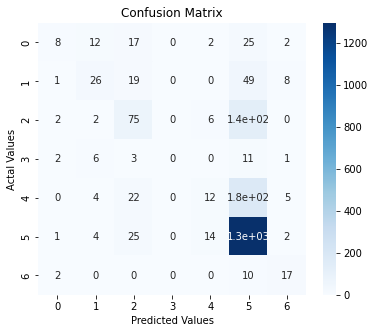

In [ ]:
cf_matrix = confusion_matrix(yt, p1)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# CNN Model 2

In [ ]:
model2 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,3))) 
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
model2.summary()
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 64)         

In [ ]:
checkpointer = ModelCheckpoint(filepath='basemodel.weights.best.hdf5', verbose = 1, save_best_only=True)
history2 = model2.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
110/110 [==============================] - ETA: 0s - loss: 1.1098 - accuracy: 0.6652
Epoch 1: val_loss improved from inf to 1.08071, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 13s 107ms/step - loss: 1.1098 - accuracy: 0.6652 - val_loss: 1.0807 - val_accuracy: 0.6690
Epoch 2/10
110/110 [==============================] - ETA: 0s - loss: 0.9918 - accuracy: 0.6698
Epoch 2: val_loss improved from 1.08071 to 1.06087, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 11s 104ms/step - loss: 0.9918 - accuracy: 0.6698 - val_loss: 1.0609 - val_accuracy: 0.6690
Epoch 3/10
110/110 [==============================] - ETA: 0s - loss: 0.9411 - accuracy: 0.6713
Epoch 3: val_loss improved from 1.06087 to 0.91950, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 12s 105ms/step - loss: 0.9411 - accuracy: 0.6713 - val_loss: 0.9195 - val_accuracy: 0.6790
Epoch 4/10
110/110 [======

In [ ]:
prediction = model2.predict(x_test)

In [ ]:
pred_2 = np.zeros_like(prediction)
pred_2[np.arange(len(prediction)), prediction.argmax(1)] = 1
print(pred_2)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
p2 = [np.argmax(p, axis=None, out=None) for p in pred_2]
report2 = classification_report(yt, p2)
print(report2)

              precision    recall  f1-score   support

           0       0.80      0.06      0.11        66
           1       0.35      0.29      0.32       103
           2       0.39      0.46      0.42       220
           3       0.00      0.00      0.00        23
           4       0.40      0.05      0.09       223
           5       0.78      0.94      0.85      1341
           6       0.50      0.07      0.12        29

    accuracy                           0.70      2005
   macro avg       0.46      0.27      0.27      2005
weighted avg       0.66      0.70      0.65      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


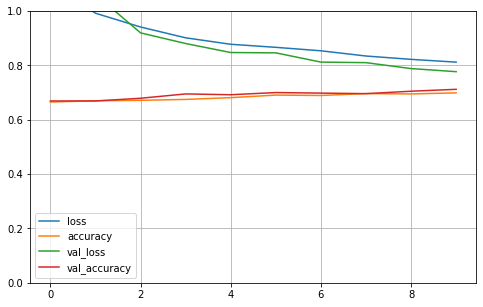

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Load the weights with the best validation accuracy
model2.load_weights('basemodel.weights.best.hdf5')

# Evaluate the model on test set
score = model2.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7007481455802917


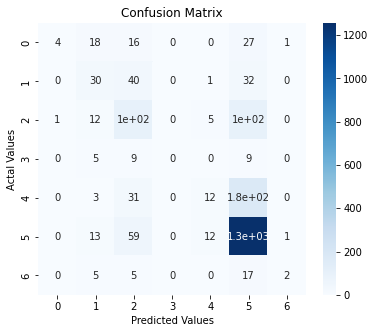

In [ ]:
cf_matrix = confusion_matrix(yt, p2)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# CNN Model 3

In [ ]:
model3 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model3.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,3))) 
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model3.add(tf.keras.layers.Dropout(0.25))

model3.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model3.add(tf.keras.layers.Dropout(0.25))

model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model3.add(tf.keras.layers.Dropout(0.25))

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
model3.summary()
model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 256)       3328      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 256)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       131200    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 7, 7, 128)        

In [ ]:
checkpointer = ModelCheckpoint(filepath='basemodel.weights.best.hdf5', verbose = 1, save_best_only=True)
history3 = model3.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
110/110 [==============================] - ETA: 0s - loss: 1.0855 - accuracy: 0.6658
Epoch 1: val_loss improved from inf to 1.01518, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 57s 510ms/step - loss: 1.0855 - accuracy: 0.6658 - val_loss: 1.0152 - val_accuracy: 0.6690
Epoch 2/10
110/110 [==============================] - ETA: 0s - loss: 0.9816 - accuracy: 0.6698
Epoch 2: val_loss improved from 1.01518 to 0.94617, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 53s 486ms/step - loss: 0.9816 - accuracy: 0.6698 - val_loss: 0.9462 - val_accuracy: 0.6690
Epoch 3/10
110/110 [==============================] - ETA: 0s - loss: 0.9391 - accuracy: 0.6695
Epoch 3: val_loss improved from 0.94617 to 0.88430, saving model to basemodel.weights.best.hdf5
110/110 [==============================] - 50s 456ms/step - loss: 0.9391 - accuracy: 0.6695 - val_loss: 0.8843 - val_accuracy: 0.6740
Epoch 4/10
110/110 [======

In [ ]:
prediction = model3.predict(x_test)

In [ ]:
pred_3 = np.zeros_like(prediction)
pred_3[np.arange(len(prediction)), prediction.argmax(1)] = 1
print(pred_3)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
p3 = [np.argmax(p, axis=None, out=None) for p in pred_3]
report3 = classification_report(yt, p3)
print(report3)

              precision    recall  f1-score   support

           0       0.42      0.12      0.19        66
           1       0.39      0.43      0.41       103
           2       0.52      0.39      0.45       220
           3       0.00      0.00      0.00        23
           4       0.50      0.05      0.10       223
           5       0.76      0.95      0.85      1341
           6       0.80      0.28      0.41        29

    accuracy                           0.72      2005
   macro avg       0.49      0.32      0.34      2005
weighted avg       0.67      0.72      0.66      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


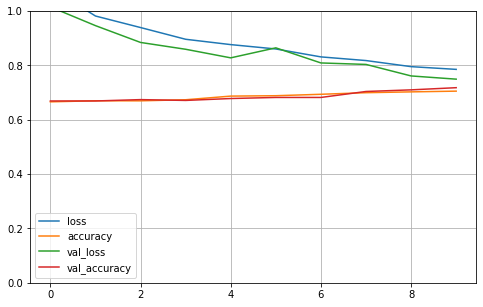

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Load the weights with the best validation accuracy
model3.load_weights('basemodel.weights.best.hdf5')

# Evaluate the model on test set
score = model3.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7162094712257385


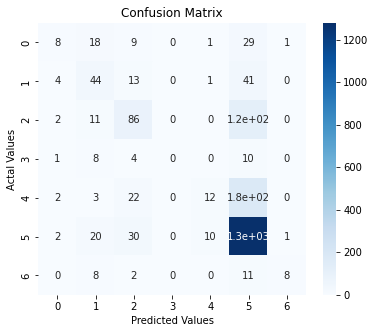

In [ ]:
cf_matrix = confusion_matrix(yt, p3)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# CNN Model 4

In [ ]:
model4 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model4.add(tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,3))) 
model4.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model4.add(tf.keras.layers.Dropout(0.25))

model4.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model4.add(tf.keras.layers.Dropout(0.25))

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(256, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(tf.keras.layers.Dense(7, activation='softmax'))

# Take a look at the model summary
model4.summary()

model4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model3.weights.best.hdf5', verbose = 1, save_best_only=True)
history4 = model4.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# Load the weights with the best validation accuracy
model4.load_weights('model3.weights.best.hdf5')

# Evaluate the model on test set
score = model4.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 256)       19456     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 256)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       295040    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 7, 7, 128)        

In [ ]:
prediction = model4.predict(x_test)
pred_4 = np.zeros_like(prediction)
pred_4[np.arange(len(prediction)), prediction.argmax(1)] = 1

In [ ]:
p4 = [np.argmax(p, axis=None, out=None) for p in pred_4]
report4 = classification_report(yt, p4)
print(report4)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.25      0.03      0.05       103
           2       0.33      0.41      0.37       220
           3       0.00      0.00      0.00        23
           4       1.00      0.00      0.01       223
           5       0.75      0.97      0.85      1341
           6       0.00      0.00      0.00        29

    accuracy                           0.69      2005
   macro avg       0.33      0.20      0.18      2005
weighted avg       0.66      0.69      0.61      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


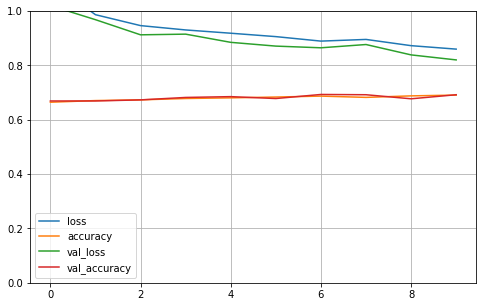

In [ ]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

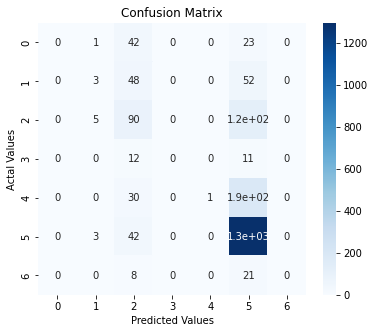

In [ ]:
cf_matrix = confusion_matrix(yt, p4)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# CNN Model 5

In [ ]:
model5 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model5.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,3))) 
model5.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model5.add(tf.keras.layers.Dropout(0.25))

model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model5.add(tf.keras.layers.Dropout(0.25))

model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.Dense(7, activation='softmax'))

# Take a look at the model summary
model5.summary()
model5.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model6.weights.best.hdf5', verbose = 1, save_best_only=True)
history5 =  model5.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# Load the weights with the best validation accuracy
model5.load_weights('model6.weights.best.hdf5')

# Evaluate the model on test set
score = model5.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 7, 7, 32)         

In [ ]:
prediction = model5.predict(x_test)
pred_5 = np.zeros_like(prediction)
pred_5[np.arange(len(prediction)), prediction.argmax(1)] = 1

In [ ]:
p5 = [np.argmax(p, axis=None, out=None) for p in pred_5]
report5 = classification_report(yt, p5)
print(report5)

              precision    recall  f1-score   support

           0       0.43      0.14      0.21        66
           1       0.42      0.29      0.34       103
           2       0.47      0.43      0.45       220
           3       0.00      0.00      0.00        23
           4       0.33      0.04      0.07       223
           5       0.77      0.96      0.85      1341
           6       0.74      0.48      0.58        29

    accuracy                           0.72      2005
   macro avg       0.45      0.33      0.36      2005
weighted avg       0.65      0.72      0.66      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


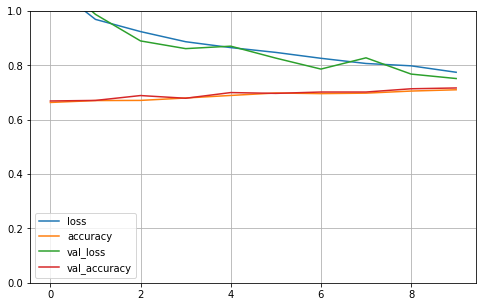

In [ ]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

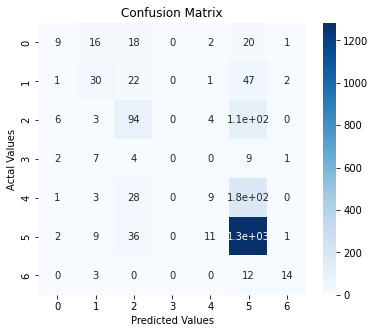

In [ ]:
cf_matrix = confusion_matrix(yt, p5)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# CNN Model 6

In [ ]:
model6 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,3))) 
model6.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model6.add(tf.keras.layers.Dropout(0.3))

model6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model6.add(tf.keras.layers.Dropout(0.3))

model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(256, activation='relu'))
model6.add(tf.keras.layers.Dropout(0.5))
model6.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
# Take a look at the model summary
model6.summary()
model6.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model6.weights.best.hdf5', verbose = 1, save_best_only=True)
history6 =  model6.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# Load the weights with the best validation accuracy
model6.load_weights('model6.weights.best.hdf5')

# Evaluate the model on test set
score = model6.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        416       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 7, 7, 32)         

In [ ]:
prediction = model6.predict(x_test)
pred_6 = np.zeros_like(prediction)
pred_6[np.arange(len(prediction)), prediction.argmax(1)] = 1

In [ ]:
p6 = [np.argmax(p, axis=None, out=None) for p in pred_6]
report6 = classification_report(yt, p6)
print(report6)

              precision    recall  f1-score   support

           0       0.67      0.03      0.06        66
           1       0.37      0.20      0.26       103
           2       0.38      0.41      0.39       220
           3       0.00      0.00      0.00        23
           4       0.50      0.02      0.04       223
           5       0.76      0.96      0.85      1341
           6       0.00      0.00      0.00        29

    accuracy                           0.70      2005
   macro avg       0.38      0.23      0.23      2005
weighted avg       0.64      0.70      0.63      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


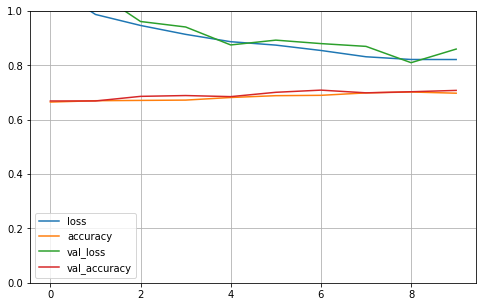

In [ ]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

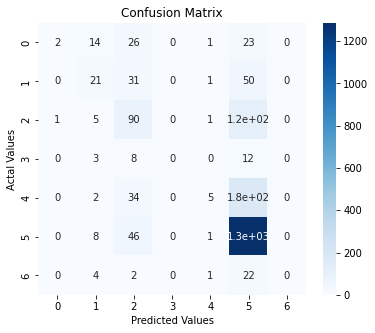

In [ ]:
cf_matrix = confusion_matrix(yt, p6)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# CNN Model 7

In [ ]:
model7 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model7.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,3))) 
model7.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model7.add(tf.keras.layers.Dropout(0.3))

model7.add(tf.keras.layers.Flatten())
model7.add(tf.keras.layers.Dense(256, activation='relu'))
model7.add(tf.keras.layers.Dropout(0.5))
model7.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
model7.summary()
model7.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model7.weights.best.hdf5', verbose = 1, save_best_only=True)
history7 =  model7.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# Load the weights with the best validation accuracy
model7.load_weights('model7.weights.best.hdf5')

# Evaluate the model on test set
score = model7.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        208       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               803072    
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                      

In [ ]:
prediction = model7.predict(x_test)
pred_7 = np.zeros_like(prediction)
pred_7[np.arange(len(prediction)), prediction.argmax(1)] = 1

In [ ]:
p7 = [np.argmax(p, axis=None, out=None) for p in pred_7]
report7 = classification_report(yt, p7)
print(report7)

              precision    recall  f1-score   support

           0       0.33      0.02      0.03        66
           1       0.38      0.47      0.42       103
           2       0.50      0.33      0.40       220
           3       0.00      0.00      0.00        23
           4       0.57      0.05      0.10       223
           5       0.76      0.97      0.85      1341
           6       0.70      0.24      0.36        29

    accuracy                           0.72      2005
   macro avg       0.46      0.30      0.31      2005
weighted avg       0.67      0.72      0.65      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


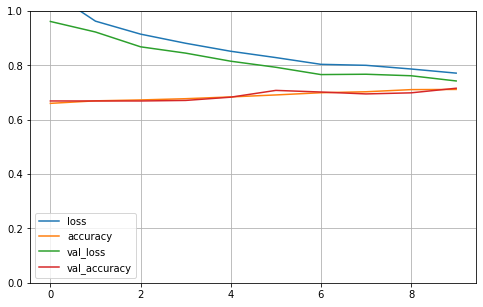

In [ ]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

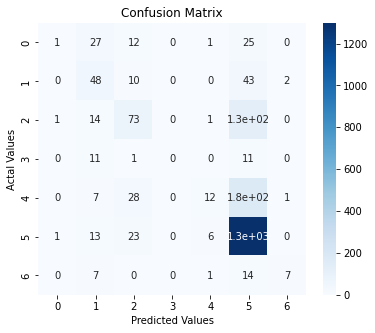

In [ ]:
cf_matrix = confusion_matrix(yt, p7)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)
print(p7)

[5, 1, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 2, 2, 5, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 5, 5, 5, 1, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 4, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 2, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 2, 5, 5, 5, 

In [ ]:
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [ ]:
y_test_og = data['test_labels']
accuracy_metric(yt,p1)

71.47132169576061

In [ ]:
accuracy_metric(yt,p2)

70.07481296758104

In [ ]:
accuracy_metric(yt,p3)

71.6209476309227

In [ ]:
accuracy_metric(yt,p4)

69.32668329177058

In [ ]:
accuracy_metric(yt,p5)

71.7206982543641

In [ ]:
accuracy_metric(yt,p6)

70.02493765586036

In [ ]:
accuracy_metric(yt,p7)

71.77057356608478

In [ ]:
from collections import Counter

In [ ]:
def ensemble_clf(arr1,arr2,arr3,arr4,arr5,arr6,arr7):
  lst = []
  for i in range(0,len(p1)):
    g = [arr1[i],arr2[i],arr3[i],arr4[i],arr5[i],arr6[i],arr7[i]]
    counts = Counter(g)
    majority = counts.most_common()
    lst.append(majority[0][0])
  return lst


In [ ]:
final_prediction = ensemble_clf(p1,p2,p3,p4,p5,p6,p7)

In [ ]:
final_prediction = np.array(final_prediction)
print(final_prediction)

[5 1 2 ... 5 5 5]


In [ ]:
accuracy_metric(y_test_og,final_prediction)

71.92019950124688

In [ ]:
report_ensemble = classification_report(yt, final_prediction)
print(report_ensemble)

              precision    recall  f1-score   support

           0       0.71      0.08      0.14        66
           1       0.46      0.31      0.37       103
           2       0.45      0.41      0.43       220
           3       0.00      0.00      0.00        23
           4       0.60      0.03      0.05       223
           5       0.76      0.97      0.85      1341
           6       0.80      0.28      0.41        29

    accuracy                           0.72      2005
   macro avg       0.54      0.30      0.32      2005
weighted avg       0.68      0.72      0.65      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(yt, final_prediction)

print(cf_matrix)

[[   5   16   19    0    1   24    1]
 [   0   32   22    0    0   48    1]
 [   2    4   91    0    1  122    0]
 [   0    7    6    0    0   10    0]
 [   0    2   30    0    6  185    0]
 [   0    5   34    0    2 1300    0]
 [   0    4    2    0    0   15    8]]


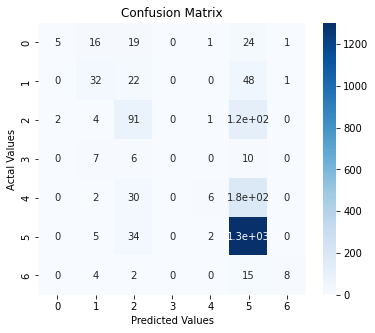

In [ ]:
cf_matrix = confusion_matrix(yt, final_prediction)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()